# ML4SCI TASK 2

# Quark-Gluon Classification
**ACTUALLY THE ARRAY IS OF SIZE 3 IN WHICH EACH ELEMENT IS ITSELF AN ARRAY OF 125 ELEMENTS AND THAT 125 ELEMENTS IS AN ARRAY OF 125 ELEMENTS**

**THIS NOTEBOOK SHOWS THE CONVERSION OF THIS TYPE OF MATRIX INTO 3,125,125**

THE KAGGLE NOTEBOOK LINK IS HERE-https://www.kaggle.com/code/vishakkbhat/ml4sci-task-2

In [31]:
# importing basic modules"
import pandas as pd
import numpy as np

**Lets import the data......**

**We find that the data is toooo huge and normal pd.read_parquet('') causes cpu overload and hence doesnt get read**

**SO WHAT IS MY APPRACH??**

* 1) **I ran a for loop from 0 to total rows with step size of chunk_size variable**
* 2) **Then reading the ith elementand converting it into pandas**
* 3) **Lastly appending them all to form the dataFrame**

**TO SET THE NUMBER OF EXAMPLES TO EXTRACT**


**If u set the value of chunk size as n , then u will get total rows//n number of examples**

In [32]:
import pyarrow.parquet as pq
# Set the size of each chunk in rows
chunk_size = 25

# Create a Parquet file reader object
parquet_file = pq.ParquetFile('/kaggle/input/ml4sci/QCDToGGQQ_IMGjet_RH1all_jet0_run0_n36272.test.snappy.parquet')

# Determine the total number of rows in the file
total_rows = parquet_file.metadata.num_rows

# Loop over the file in chunks
dfs = []
for i in range(0, total_rows, chunk_size):
    # Read a chunk of rows from the file
    chunk = parquet_file.read_row_group(i)
    df = chunk.to_pandas()
#     print(i)
    dfs.append(df)

# Concatenate all the DataFrames into a single DataFrame
final_df = pd.concat(dfs, ignore_index=True)


In [33]:
parquet_file.metadata    #Shows us what is there inside the parquet file

  created_by: parquet-cpp version 1.3.1-SNAPSHOT
  num_columns: 4
  num_rows: 36272
  num_row_groups: 36272
  format_version: 1.0
  serialized_size: 14143781

In [34]:
parquet_file.read_row_group(0).to_pandas()

,X_jets,pt,m0,y
0,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",112.411095,21.098248,0.0


In [35]:
final_df['X_jets'][0].shape



(3,)

**Above we see that the each element under the X_jets is just an array of 3 elements... but that 3 elements is it self an array of 125 elements where that 125 elements is an array of 125 elements**

**I created a function that stacks this and creates a 3,125,125 matrix**

In [36]:
def to_3d(arr):
    vishak=[]
    for i in range (0,3):
        vis=np.stack(np.stack(arr)[i],axis=-1)
        vishak.append(vis)
    vishak=np.array(vishak)
    return vishak

    


**calling the above created function**

In [37]:
rr=final_df['X_jets'].shape[0]

In [38]:
for i in range (0,rr):
    final_df['X_jets'][i]=to_3d(final_df['X_jets'][i])
    


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
final_df['X_jets'][0],final_df['X_jets'][0].shape

(array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]]),
 (3, 125, 125))

**So we see that our dataframe final_df now has a column called X_jets which contains 3,125,125 sized matrix**

In [40]:
import matplotlib.pyplot as plt

**Lets plot and see how the image looks like**

Label is =0.0


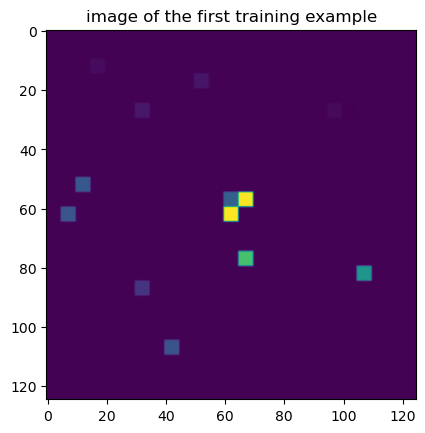

In [41]:
plt.imshow(final_df['X_jets'][0][0,:,:])
plt.imshow(final_df['X_jets'][0][1,:,:])
plt.imshow(final_df['X_jets'][0][2,:,:])

plt.title("image of the first training example");
label=final_df['y'][0]
print(f"Label is ={label}")


**Plotting multiple images and seeing**

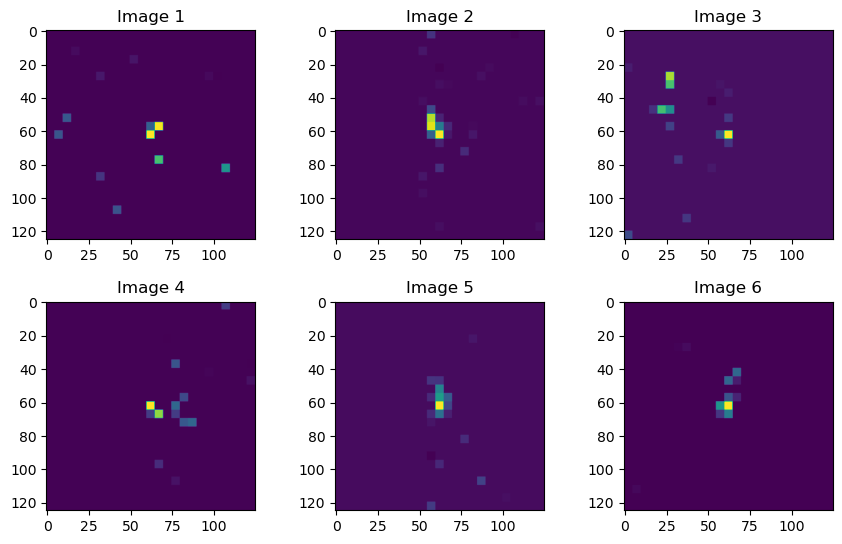

In [42]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

# Loop over the axes and image ids, and plot each image on a separate subplot
for i, ax in enumerate(axes.flatten()):
    image = final_df['X_jets'][i][2,:,:]
    ax.imshow(image)
    ax.set_title(f'Image {i+1}')
    
# Adjust spacing between subplots
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)

# Show the plot
plt.show()

# TASKS PERFORMED

1. **Created a dataframe now which has the matrix of 3,125,125 and pt m0 and label y**
2. **Now lets create the class dataset and dataloader and then split the data into training and testing set**
3. **Lets now create the class of architecture which contains the architecture from nn.module**
4. **Setting the optimizer and the scheduler and the criterion**
5. **Validating our model with the help of metrics like accuracy and roc auc etc**

In [43]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader,Dataset, random_split
import torch.optim as optim

<AxesSubplot:>

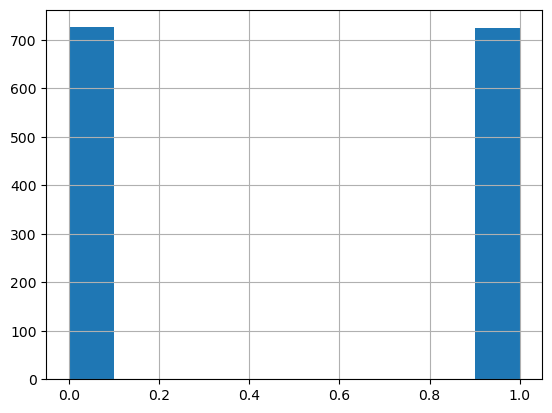

In [44]:
final_df['y'].hist()

**Almost equal examples for both the classes... NO DATA IMBALANCE**

**This class below converts returns us the value of X and y which is the matrix for image and the respected targer in tensor float 32**

In [45]:
class QGdset(Dataset):
    
    def __init__(self,ddf):
        
        self.data=ddf
        self.X= ddf['X_jets']
        self.y= ddf['y']
        self.pt= ddf['pt']
        self.m0= ddf['m0']
        
    def __len__(self):
        return (self.data.shape[0])
    
    def __getitem__(self,idx): 
        
        
        return torch.tensor(self.X[idx]/12,dtype=torch.float32), torch.tensor(self.y[idx],dtype=torch.float32)

In [46]:
train_data= QGdset(final_df)

**LETS SPLIT THE train_data INTO TRAIN AND TEST SO THAT WE CAN VALIDATE OUR MODEL**

In [47]:
train_size = int(0.8 * len(train_data))  # use 80% of data for training
test_size = len(train_data) - train_size  # use remaining 20% for testing
train_dataset, test_dataset = random_split(train_data, [train_size, test_size])  # split dataset into train and test


In [48]:
len(train_dataset),len(test_dataset)

(1160, 291)

**Setting up the dataLoaders so that we can feed it to the loops further**

In [49]:
train_loader= DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=32,shuffle=True)

**Creating architure as below**

QGArchi(
*   (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
*   (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) 
*   (relu1): ReLU()
*   (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
*   (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
*   (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
*   (relu2): ReLU()
*   (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
*   (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
*   (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
*   (relu3): ReLU()
*   (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
*   (fc1): Linear(in_features=14400, out_features=128, bias=True)
*   (fc2): Linear(in_features=128, out_features=1, bias=True))**

In [50]:
import torch.nn as nn

class QGArchi(nn.Module):
    def __init__(self):
        super(QGArchi, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(16)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 15 * 15, 128)
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu1(out)
        out = self.pool1(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu2(out)
        out = self.pool2(out)
        out = self.conv3(out)
        out = self.bn3(out)
        out = self.relu3(out)
        out = self.pool3(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.fc2(out)
        return nn.Sigmoid()(out.squeeze())


In [51]:
model=QGArchi()

In [52]:
# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the learning rate and optimizer
lr = 0.001
optimizer = optim.Adam(QGArchi().parameters(), lr=lr)

# Define the scheduler
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.1, patience=2)

**Lets write the code to set the device that is the GPU**

In [53]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [54]:
device    #checking if the device is on cuda...

device(type='cuda')

In [55]:
from sklearn.metrics import roc_auc_score, confusion_matrix ,plot_confusion_matrix,roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


#we need to import these stuffs to validate our model and see the losses and accuracy

In [56]:
# Set the number of epochs
epochs = 150

# Initialize the optimizer and the learning rate scheduler
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=3, factor=0.1, verbose=True)

# Initialize the loss function
criterion = nn.BCELoss()

# Move the model and the loss function to the device
model.to(device)
criterion.to(device)

# Initialize the lists to store the loss and accuracy values
train_losses = []
test_losses = []
train_accs = []
test_accs = []

# Iterate over the epochs
for epoch in range(epochs):
    # Set the model to training mode
    model.train()
    running_loss = 0
    correct_train = 0
    total_train = 0
    
    # Iterate over the training set
    for X, y in train_loader:
        # Move the input and target tensors to the device
        X, y = X.to(device), y.to(device)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward
        outputs = model(X)
        
        # Compute the loss
        loss = criterion(outputs, y.float())
        
        # Backward and optimize
        loss.backward()
        optimizer.step()
        
        # Update the running loss
        running_loss += loss.item()
        
        # Compute the number of correct predictions
        predicted_train = torch.round(outputs)
        correct_train += (predicted_train == y).sum().item()
        total_train += y.size(0)
    
    # Compute the training loss and accuracy
    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct_train / total_train
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    
    # Set the model to evaluation mode
    model.eval()
    running_loss = 0
    correct_test = 0
    total_test = 0
    y_true = []
    y_scores = []
    
    # Disable gradient computation to save memory
    with torch.no_grad():
        # Iterate over the test set
        for X, y in test_loader:
            # Move the input and target tensors to the device
            X, y = X.to(device), y.to(device)
            
            # Forward
            outputs = model(X)
            
            # Compute the loss
            loss = criterion(outputs, y.float())
            
            # Update the running loss
            running_loss += loss.item()
            
            # Compute the number of correct predictions
            predicted_test = torch.round(outputs)
            correct_test += (predicted_test == y).sum().item()
            total_test += y.size(0)
            
            # Append the true and predicted target values
            y_true += y.cpu().numpy().tolist()
            y_scores += outputs.cpu().numpy().tolist()
    
    # Compute the test loss, accuracy, and ROC-AUC score
    test_loss = running_loss / len(test_loader)
    test_acc = 100 * correct_test / total_test
    test_losses.append(test_loss)
    test_accs.append(test_acc)
    roc_auc = roc_auc_score(y_true, y_scores)
    
    # Print the loss and accuracy values
    if(epoch%30==0):print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%, ROC-AUC: {roc_auc:.4f}")
    
    # Update the learning

    scheduler.step(test_loss)


Epoch 1/150, Train Loss: 2.4838, Train Acc: 55.60%, Test Loss: 0.7914, Test Acc: 49.83%, ROC-AUC: 0.6149
Epoch 00008: reducing learning rate of group 0 to 1.0000e-04.
Epoch 00012: reducing learning rate of group 0 to 1.0000e-05.
Epoch 00016: reducing learning rate of group 0 to 1.0000e-06.
Epoch 00020: reducing learning rate of group 0 to 1.0000e-07.
Epoch 00024: reducing learning rate of group 0 to 1.0000e-08.
Epoch 31/150, Train Loss: 0.2793, Train Acc: 91.55%, Test Loss: 1.0932, Test Acc: 68.04%, ROC-AUC: 0.6929
Epoch 61/150, Train Loss: 0.2783, Train Acc: 91.81%, Test Loss: 1.0568, Test Acc: 67.70%, ROC-AUC: 0.6925
Epoch 91/150, Train Loss: 0.2778, Train Acc: 91.55%, Test Loss: 1.0672, Test Acc: 68.04%, ROC-AUC: 0.6930
Epoch 121/150, Train Loss: 0.2748, Train Acc: 91.90%, Test Loss: 1.0541, Test Acc: 68.04%, ROC-AUC: 0.6927


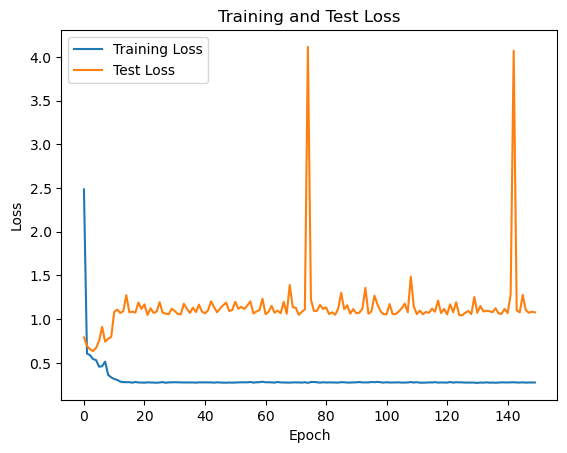

In [57]:
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Test Loss")
plt.legend()
plt.show()

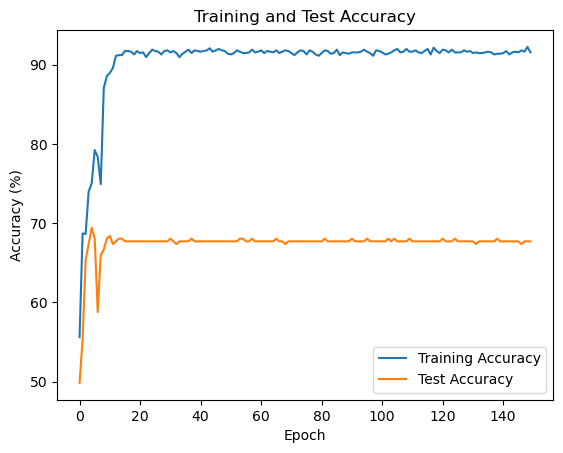

In [58]:
plt.plot(train_accs, label="Training Accuracy")
plt.plot(test_accs, label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Training and Test Accuracy")
plt.legend()
plt.show()